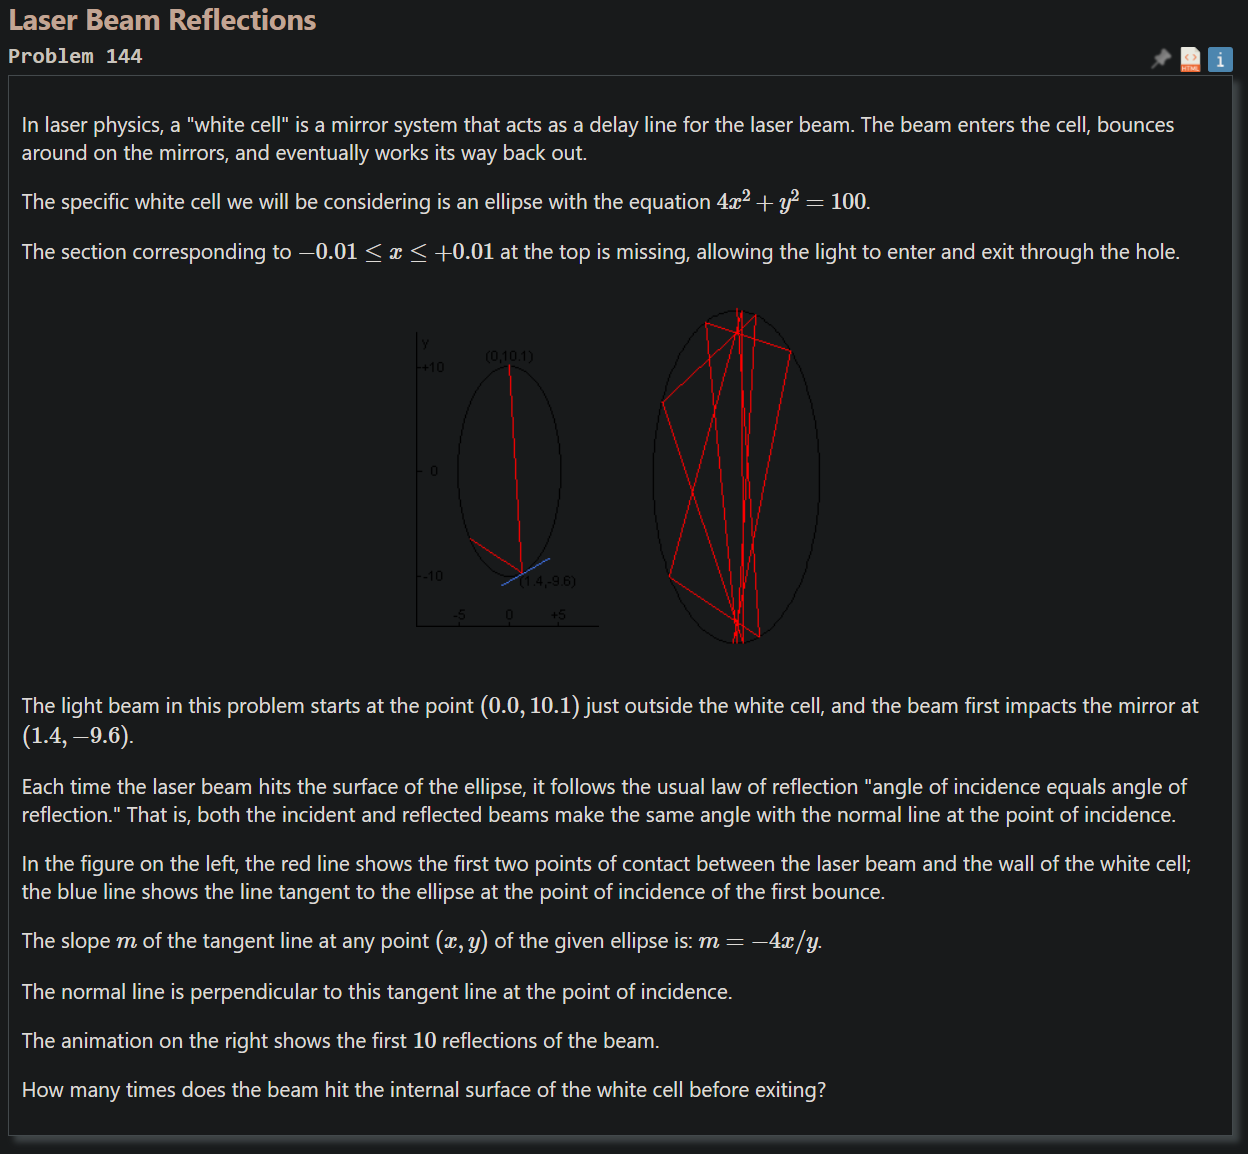

Lets try to find the gradient of the normal line and the gradient of the line of incidence.  
  
We know that if the slope of the tangent is $\frac{-4x}{y}$ then the normal will be $\frac{y}{4x}$.  
So for the first line it will be $\frac{1.4}{4*-9.6} = -\frac{12}{7}$

We know two points the angle of incidence crosses for the first iteration,  
so we can plug these into $y = mx+c$ to get values for $m$ and $c$
$10.1 = m*0 + c => 10.1 = c$  
$-9.6 = m*1.4 + 10.1 => m = -\frac{197}{14}$

In [13]:
def next_x(m, c):
    mc = -m*c
    two_a = 4+m**2
    root = 2*( 25*m**2 - c**2 + 100 )**0.5
    return (mc+root)/two_a, (mc-root)/two_a

Something I learned from searching up:
Let angle between two lanes equal $\theta$:  
$\tan\theta = |\frac{m_1 - m_2}{1+m_1 m_2}|$  
This means that if we take the angle between the line of incidence and the normal, $\theta$, then lets say $m$ is the gradient of the normal, and $m_1$ gradient of incidence $m_2$ gradient of reflection,  
then we know $\theta_i = \theta_r => |\frac{m - m_1}{1+m m_1}| = |\frac{m - m_2}{1+m m_2}|$.  
We would be trying to solve for $m_2$ as we already know $m_1$ and $m$ from problem formulation.  
Two cases here:
- either they are both positive (or both negative which would give an equivalent answer by multiplying both sides by -1)
    - this gives $m=0$ or $m_1 = m_2$
    - this could happen when $\theta = 0$ or if the reflection happens at the middle $(y = 0)$ but going to ignore for now
- one side positive and the other side negative
    - this gives $m_2 = \frac{m_1 - 2m - m^2m_1}{m^2 - 2mm_1 - 1}$
    - will be using this as probably the case most of the time, lets see if it seems correct

Now we know the gradient of the next line + a point where it hits,  
for instance the next gradient is $-\frac{21067}{34426}$ and intercepts the point $(1.4, -9.6)$.  
We can then use this process to interatively find the other point at which it hits the eclipse until it intercepts the hole.  
The other point it will hit will have $y = -\frac{21067}{34426}x + c => c = -9.6 +  \frac{21067}{34426} * 1.4 = $
We can keep this in fractions by converting x and y to fractions,  
so $y = \frac{y_n}{y_d}$ i.e $9.6 = \frac{96}{10} => y - m*x = c = \frac{y_n m_d - m_n x_n}{m_d*p}$ where $p$ is the power of 10 we divide both $y_n$ and $x_n$ by to get $y$ and $x$ respectively

Now we have the exact line,  
and we know the equation of the ellipse so we should be able to find the two points it intersects,  
one of which we already know so we can rule out.  

$4x^2 + y^2 = 100$,  
$y=mx + c$

In [14]:
next_x(-197/14, 101/10)

(1.4, 0.007107316949965891)

In [15]:
def find_different_x(x, next_x_1, next_x_2):
    x_1_diff = abs(x - next_x_1)
    x_2_diff = abs(x - next_x_2)
    if x_1_diff > x_2_diff:
        return next_x_1
    else:
        return next_x_2

assert find_different_x(0, 1.4, 0.007107316949965891) == 1.4

In [16]:
def normal_gradient(x, y):
    return y/(4*x)

assert round(normal_gradient(1.4, -9.6), 5) == -1.71429

In [17]:
def incidence_gradient(x_1, y_1, x_2, y_2):
    return (y_1 - y_2)/(x_1 - x_2)

assert round(incidence_gradient(0, 10.1, 1.4, -9.6), 5) == -14.07143

In [166]:
def next_gradient(nor_m, inc_m):
    num = inc_m - 2*nor_m - nor_m**2 * inc_m
    den = nor_m**2 - 2*nor_m*inc_m - 1
    
    return num/den

#assert next_gradient(-12/7, -197/14) == (-21067, 34426)

In [167]:
next_gradient(-12/7, -197/14)

-0.6631933513819808

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [72]:
def c_calculation(x, y, m):
    return y - m*x

In [199]:
lines = []

def next_iteration(old_x, old_y, inc_m, inc_c):
    global lines
    # two_a will be our x and y denominator
    # Calculate next X and Y using line
    next_x_1, next_x_2 = next_x(inc_m, inc_c)
    x = find_different_x(old_x, next_x_1, next_x_2)
    y = inc_m*x + inc_c
    # Calculate next normal gradient, incidence, and then gradient of reflection
    nor_m = normal_gradient(x, y)
    nor_c = c_calculation(x, y, nor_m)
    # line of incidence is old line silly
    ref_m = next_gradient(nor_m, inc_m)
    ref_c = c_calculation(x, y, ref_m)
    #print(normal_in_middle(inc_m, inc_c, nor_m, nor_c, ref_m, ref_c, x))
    #if not normal_in_middle(inc_m, inc_c, nor_m, nor_c, ref_m, ref_c, x):
    #    ref_m = -1/ref_m
    #    ref_c = c_calculation(x, y, ref_m)
    line = {'inc_m': inc_m, 'inc_c':inc_c, 'nor_m':nor_m, 'nor_c':nor_c, 'x':round(x, 3), 'y':round(y, 3)}
    lines.append(line)
    #lines['in middle?'] = normal_in_middle(inc_m, inc_c, nor_m, nor_c, ref_m, ref_c, x)
    
    return x, y, ref_m, ref_c

x, y, m, c = next_iteration(0, 10.1, -197/14, 10.1)
done = (-0.01 < x and x < 0.01 and y > 0)
i = 0
while not done:
    i+=1
    x, y, m, c = next_iteration(x, y, m, c)
    done = (-0.01 < x and x < 0.01 and y > 0)
    #print(f'{round(x, 2), round(y, 2)}')

In [200]:
i

354

(1.4, -9.6)
(-1.7142857142857144, -7.199999999999999)


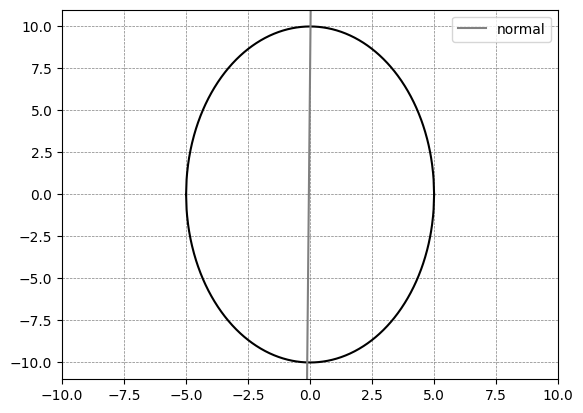

(-3.99, -6.02)
(0.37744919893900925, -4.51874362414788)


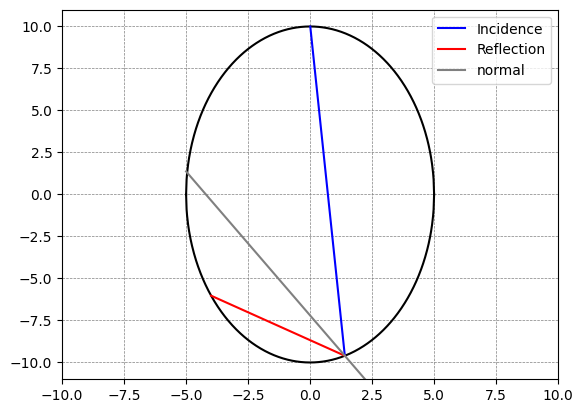

(0.32, 9.98)
(7.68594680972755, 7.484180208902195)


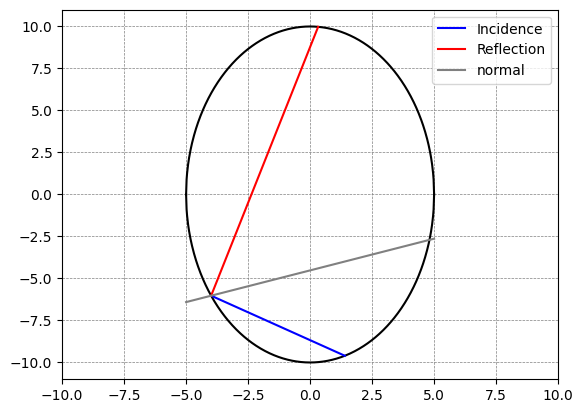

(0.42, -9.97)
(-5.981678027773035, -7.4739350654812355)


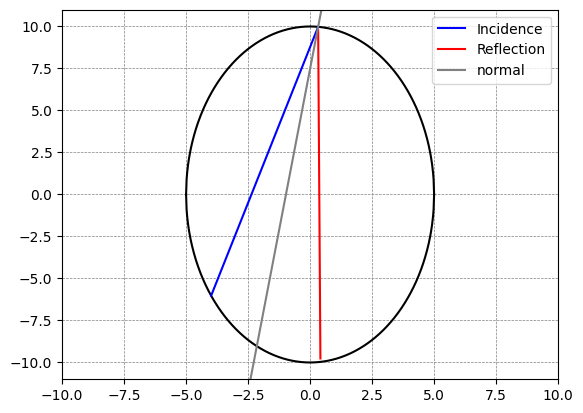

(-4.47, 4.47)
(-0.24963442376555217, 3.3501764690294333)


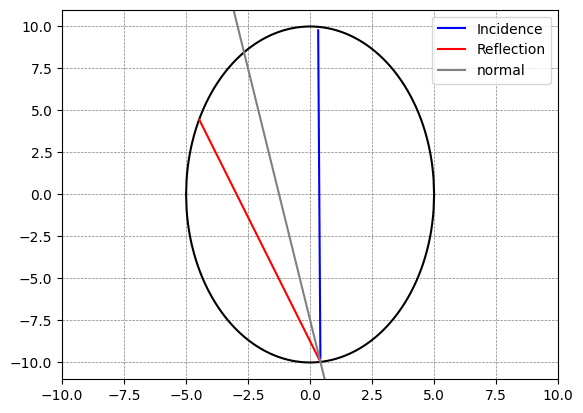

(1.13, 9.74)
(2.150459539804114, 7.3051402902605265)


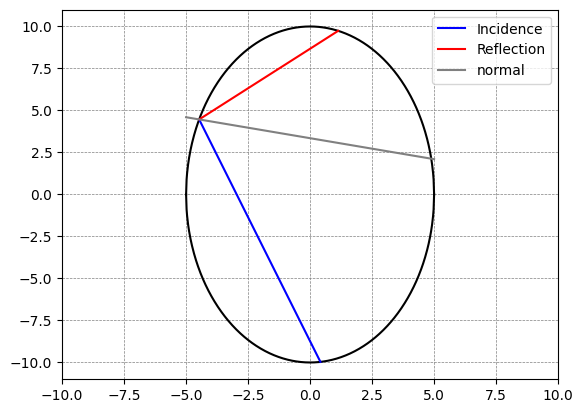

(0.05, -10.0)
(-46.59506119723931, -7.499568228473553)


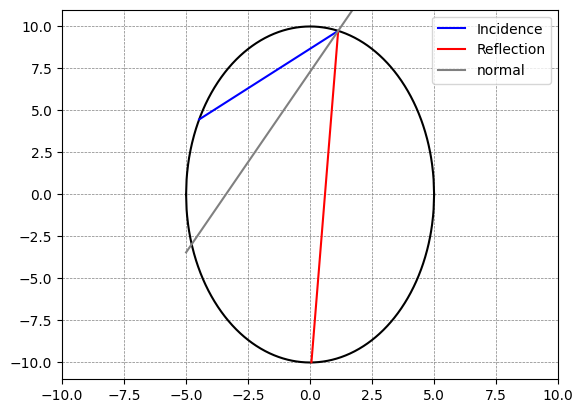

(-1.83, 9.3)
(-1.2677761745606433, 6.976987003851487)


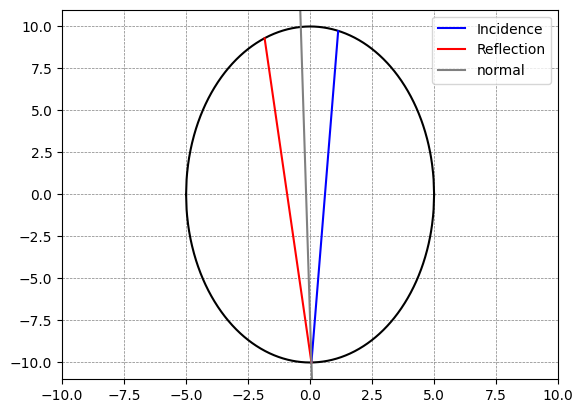

(3.29, 7.53)
(0.5727391611099797, 5.649927797206145)


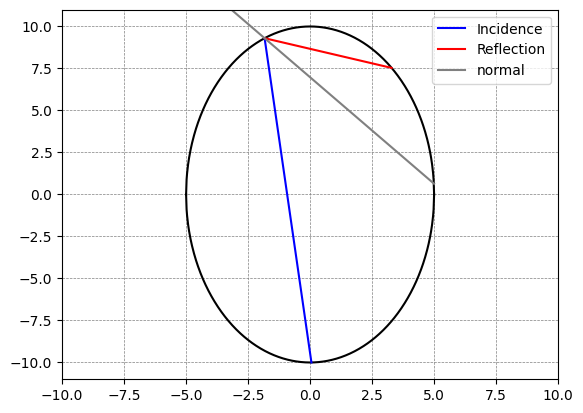

(-0.23, -9.99)
(11.026612515687335, -7.492301290232891)


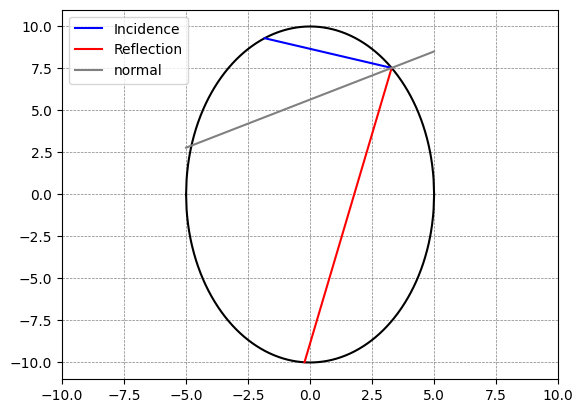

(-0.57, 9.94)
(-4.383828342142045, 7.4516883292371965)


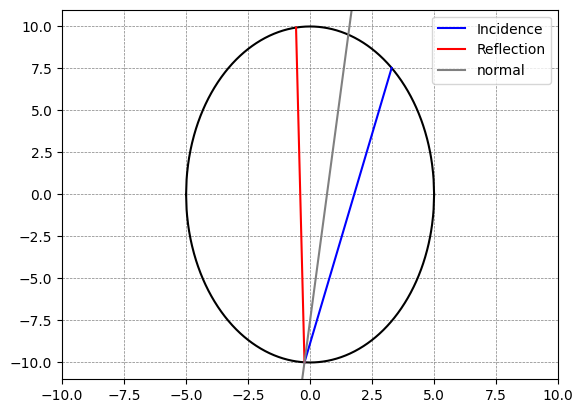

(4.9, -1.95)
(-0.09925136369806349, -1.460278493650328)


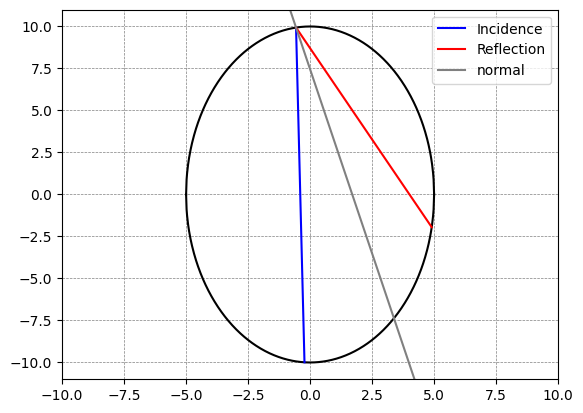

(-0.85, -9.85)
(2.889871980829078, -7.3902019010779805)


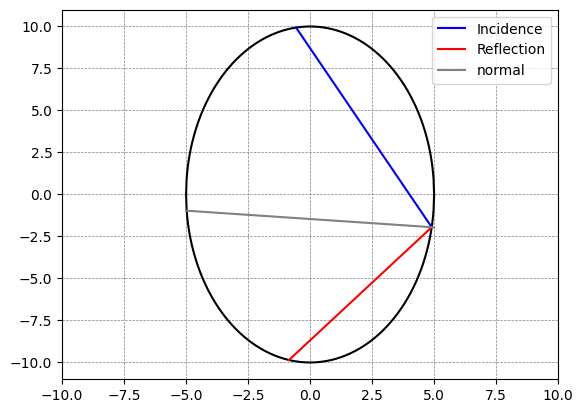

(-0.12, 10.0)
(-21.050930772968552, 7.497885318523171)


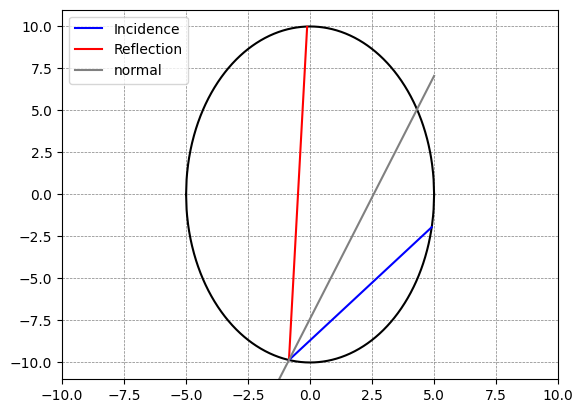

(2.37, -8.8)
(-0.9264313502828176, -6.600103240693365)


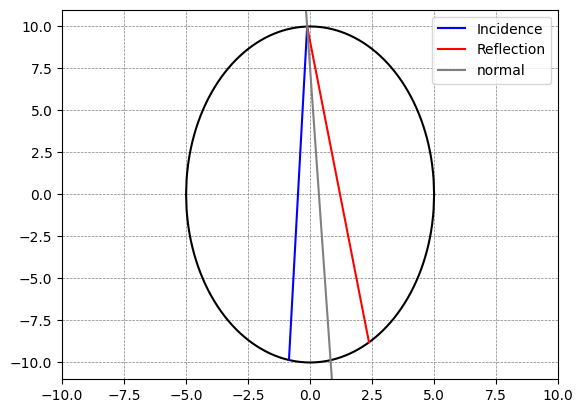

(-2.62, -8.52)
(0.814629855822824, -6.392023438257128)


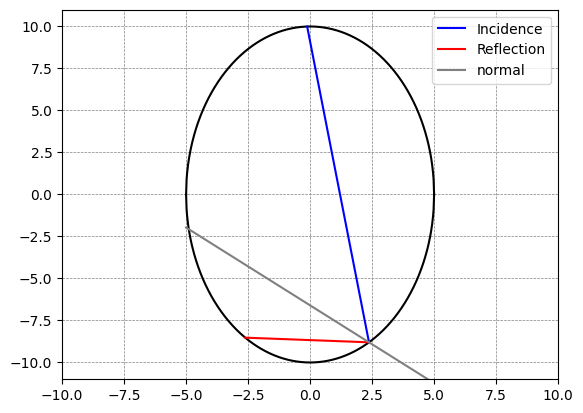

(0.15, 10.0)
(17.05151140813795, 7.496777703042755)


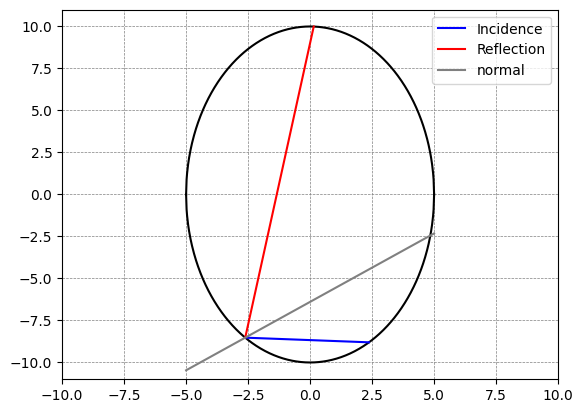

(0.76, -9.88)
(-3.2465204671248022, -7.412603945387575)


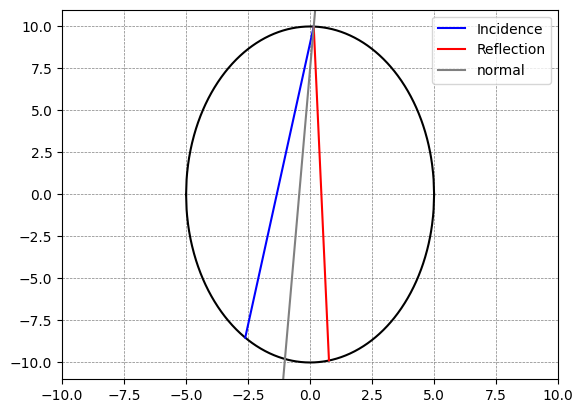

(-4.98, -0.86)
(0.04309529329869328, -0.6440415922856666)


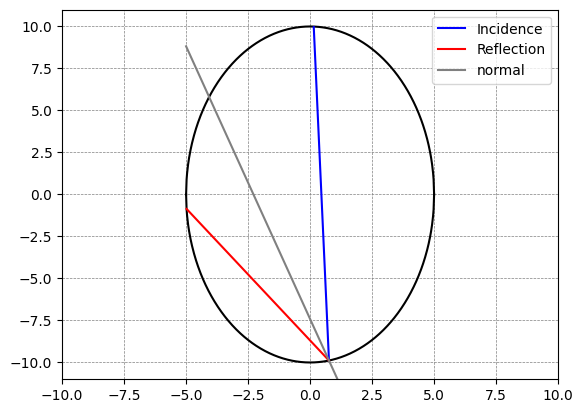

(0.64, 9.92)
(3.8933070391052995, 7.438905515673235)


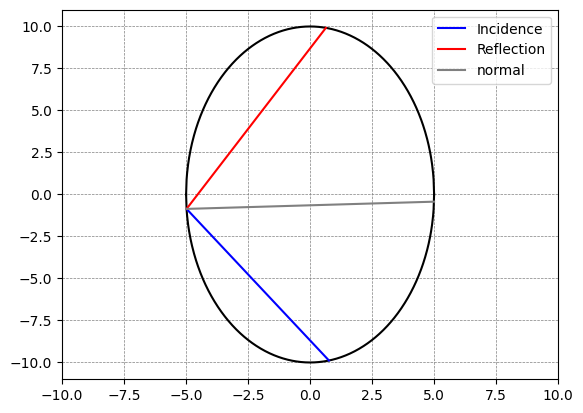

(0.19, -9.99)
(-12.920466484500944, -7.494390457569697)


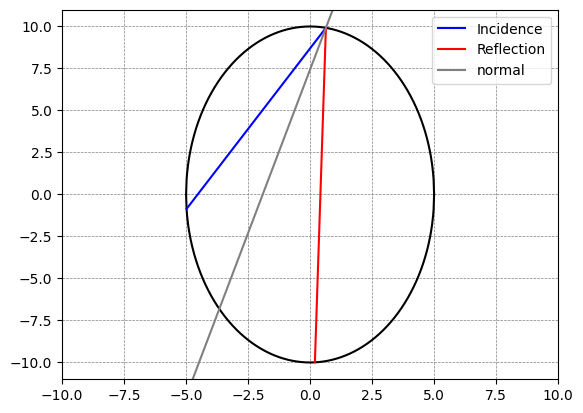

(-3.02, 7.98)
(-0.6610746293724131, 5.9817350002334075)


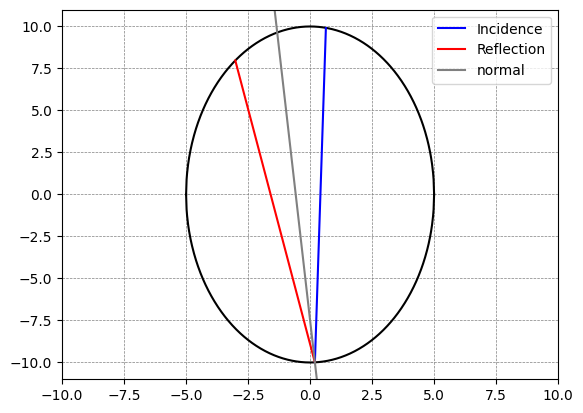

(2.03, 9.14)
(1.12314170121664, 6.851715379419434)


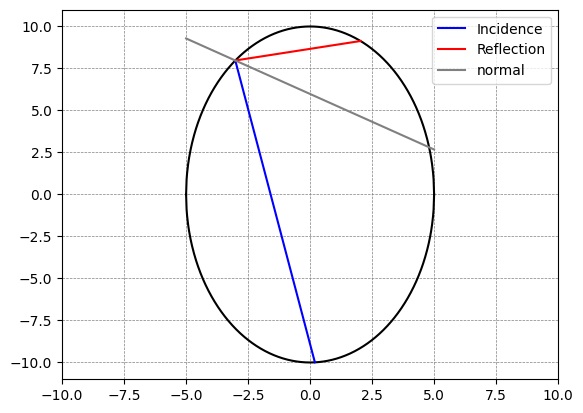

(-0.08, -10.0)
(31.88930974675397, -7.499078275836545)


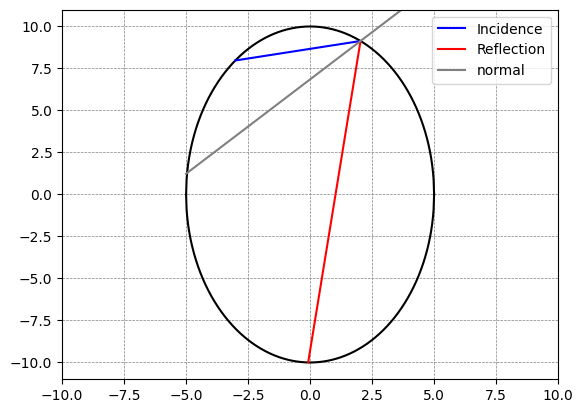

(-1.01, 9.79)
(-2.4147259295952797, 7.3442107565725525)


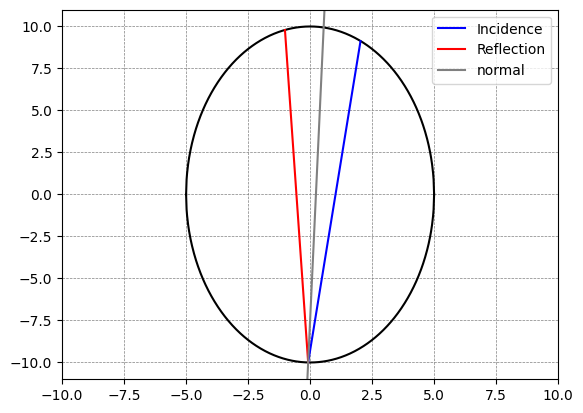

(4.68, 3.53)
(0.1889309579440629, 2.65102083446729)


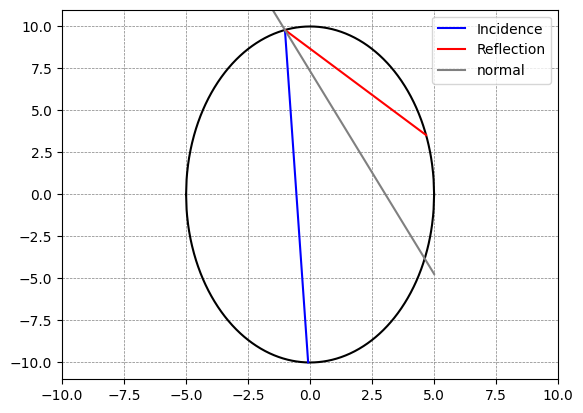

(-0.47, -9.96)
(5.285751584952553, -7.466668480644629)


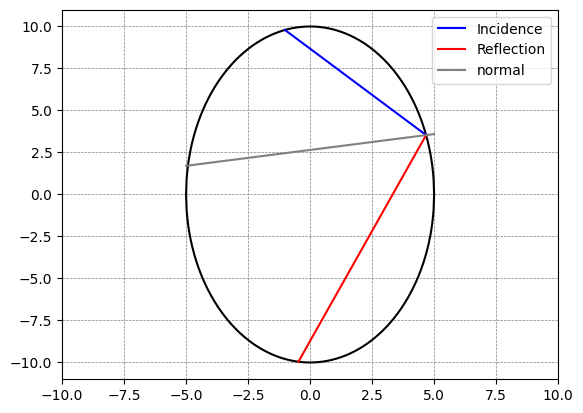

(-0.28, 9.98)
(-8.804747380946397, 7.4879360748838195)


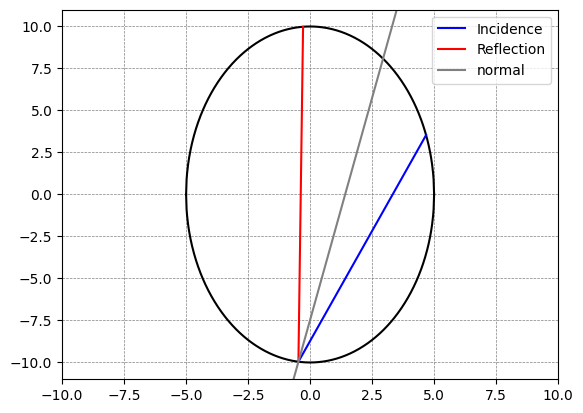

(3.72, -6.69)
(-0.449595374982612, -5.014741534084751)


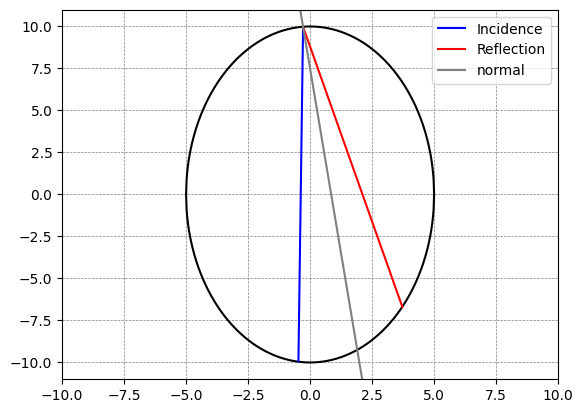

(-1.56, -9.5)
(1.524338285519842, -7.126421224167006)


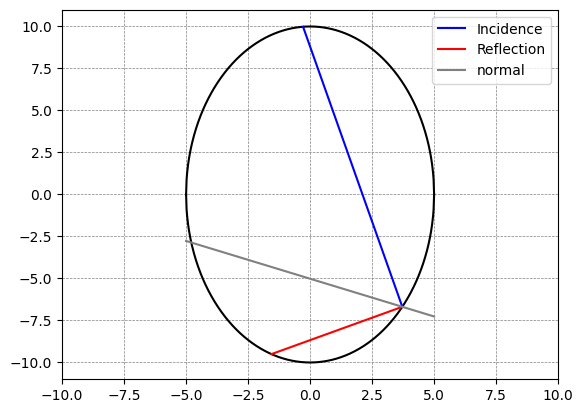

(0.02, 10.0)
(151.25947744682244, 7.499959024663775)


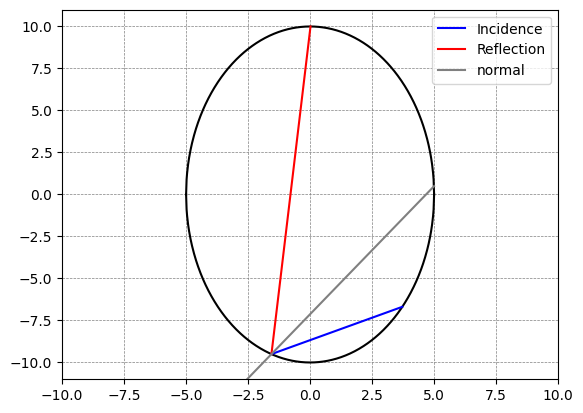

In [186]:
x = np.linspace(-5, 5, 500)
y = ( 100 - 4*x**2 )**0.5
x = np.array([x_s for x_s, y_s in zip(x, y) if 4*x_s**2 + y_s**2 < 100.1 and 4*x_s**2 + y_s**2 > 99.9])
y = np.array([y_s for x_s, y_s in zip(x, y) if 4*x_s**2 + y_s**2 < 100.1 and 4*x_s**2 + y_s**2 > 99.9])

# Generate x values
x_line = np.linspace(-5, 5, 10_000)

for l in range(len(lines)):
    plt.xlim(-10, 10)
    plt.ylim(-11, 11)
    plt.plot(x, y, color='black')
    plt.plot(x, -y, color='black')
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    for line, col, lab in zip(lines[l-1:l+1], ['blue', 'red'], ['Incidence', 'Reflection']):
        y_line = line['inc_m'] * x_line + line['inc_c']
        # make sure lines are in the ellipses
        x_line_inside = np.array([x_s for x_s, y_s in zip(x_line, y_line) if 4*x_s**2 + y_s**2 < 100])
        y_line_inside = np.array([y_s for x_s, y_s in zip(x_line, y_line) if 4*x_s**2 + y_s**2 < 100])
        plt.plot(x_line_inside, y_line_inside, color=col, label=lab)
    n_y = lines[l-1]['nor_m'] * x_line + lines[l-1]['nor_c']
    plt.plot(x_line, n_y, color='grey', label='normal')
    print(f'({lines[l]["x"]}, {lines[l]["y"]})')
    print(f'({lines[l]["nor_m"]}, {lines[l]["nor_c"]})')
    plt.legend()
    plt.show()

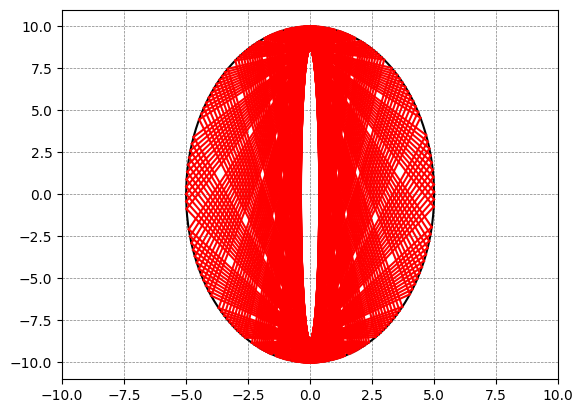

In [198]:
x = np.linspace(-5, 5, 500)
y = ( 100 - 4*x**2 )**0.5
x = np.array([x_s for x_s, y_s in zip(x, y) if 4*x_s**2 + y_s**2 < 100.1 and 4*x_s**2 + y_s**2 > 99.9])
y = np.array([y_s for x_s, y_s in zip(x, y) if 4*x_s**2 + y_s**2 < 100.1 and 4*x_s**2 + y_s**2 > 99.9])

# Generate x values
x_line = np.linspace(-5, 5, 10_000)

plt.xlim(-10, 10)
plt.ylim(-11, 11)
plt.plot(x, y, color='black')
plt.plot(x, -y, color='black')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
for line in lines:
    y_line = line['inc_m'] * x_line + line['inc_c']
    # make sure lines are in the ellipses
    x_line_inside = np.array([x_s for x_s, y_s in zip(x_line, y_line) if 4*x_s**2 + y_s**2 < 100])
    y_line_inside = np.array([y_s for x_s, y_s in zip(x_line, y_line) if 4*x_s**2 + y_s**2 < 100])
    plt.plot(x_line_inside, y_line_inside, color='red')
plt.show()